# 1. Carregando bibliotecas

In [ ]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils import to_categorical
from keras import backend as K
import numpy as np
from keras.utils import plot_model
from tensorflow.keras import regularizers

Inicializa o Google Drive. É necessário entrar com as credenciais do Gmail

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Carrega do dataset (treino e teste)

 Carrega os dados do dataset MINST

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
set(y_test)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
x_train.shape

(60000, 28, 28)

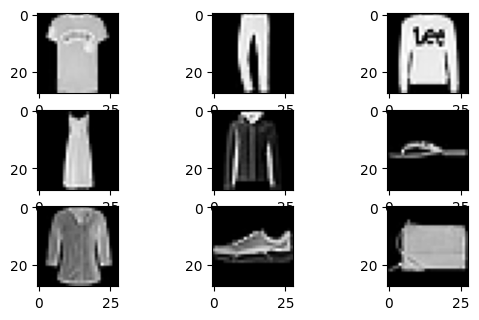

In [ ]:
classes = set(y_test)

plt.figure(0)
for c in classes:
  idx =  np.where(y_test == c)
  if c + 1 == 10:
    break
  plt.subplot(430 + 1 + c)
  # plot raw pixel data
  plt.imshow(x_test[idx[0][0]], cmap=plt.get_cmap('gray'))

plt.show()

In [ ]:
x_train.shape

(60000, 28, 28)

Deixando setado as camadas de cores (preto e branco) no dataset

In [ ]:
# Expandir a dimensão do canal de cor para as imagens de treinamento e teste
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# 3. Redimensionando as imagens e dividindo cada pixel em cada imagem por 255

In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# 4.  Dividindo o dataset em treinamento, teste e validação

In [ ]:
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
x_train.shape

(55000, 28, 28, 1)

In [ ]:
x_valid.shape

(5000, 28, 28, 1)

In [ ]:
print('x_train shape:', x_train.shape)

x_train shape: (55000, 28, 28, 1)


In [ ]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

55000 train samples
10000 test samples


# 5. Arquitetura da Rede Neural CNN

In [ ]:
# Definir o modelo
model = Sequential()

# Primeira camada convolucional
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Segunda camada convolucional
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Camada Flatten
model.add(Flatten())

# Camada densa
model.add(Dense(256, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.25))

# Camada de saída
model.add(Dense(10, activation='softmax'))


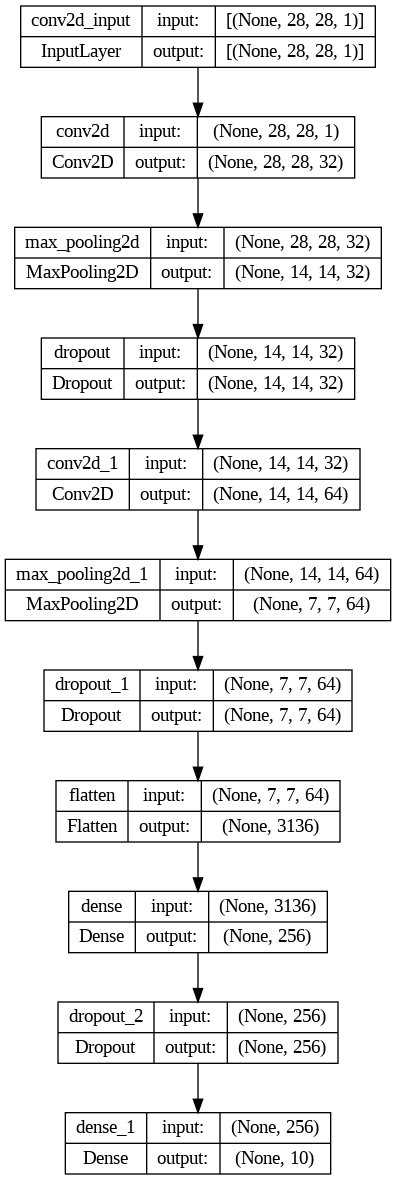

In [ ]:
# Plotar o modelo
plot_model(model, to_file='cnn-MNIST.png', show_shapes=True, show_layer_names=True)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

# 6. Compilando e Treinando o Modelo

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/modelos/modeloMNIST_FIAP.hdf5', verbose=1,  save_best_only=True, monitor='val_accuracy') #

hist = model.fit(x_train, y_train, batch_size=300, epochs=10, validation_data=(x_valid, y_valid), callbacks=[checkpointer], verbose=1, shuffle=True)

Epoch 1/10
184/184 [==============================] - ETA: 0s - loss: 1.3841 - accuracy: 0.6887
Epoch 1: val_accuracy improved from -inf to 0.78440, saving model to /content/drive/My Drive/modelos/modeloMNIST_FIAP.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


184/184 [==============================] - 85s 445ms/step - loss: 1.3841 - accuracy: 0.6887 - val_loss: 0.7651 - val_accuracy: 0.7844
Epoch 2/10
184/184 [==============================] - ETA: 0s - loss: 0.7166 - accuracy: 0.7896
Epoch 2: val_accuracy improved from 0.78440 to 0.81600, saving model to /content/drive/My Drive/modelos/modeloMNIST_FIAP.hdf5
184/184 [==============================] - 72s 392ms/step - loss: 0.7166 - accuracy: 0.7896 - val_loss: 0.6362 - val_accuracy: 0.8160
Epoch 3/10
184/184 [==============================] - ETA: 0s - loss: 0.6440 - accuracy: 0.8128
Epoch 3: val_accuracy improved from 0.81600 to 0.81780, saving model to /content/drive/My Drive/modelos/modeloMNIST_FIAP.hdf5
184/184 [==============================] - 71s 388ms/step - loss: 0.6440 - accuracy: 0.8128 - val_loss: 0.6079 - val_accuracy: 0.8178
Epoch 4/10
184/184 [==============================] - ETA: 0s - loss: 0.6099 - accuracy: 0.8236
Epoch 4: val_accuracy improved from 0.81780 to 0.84180, sa

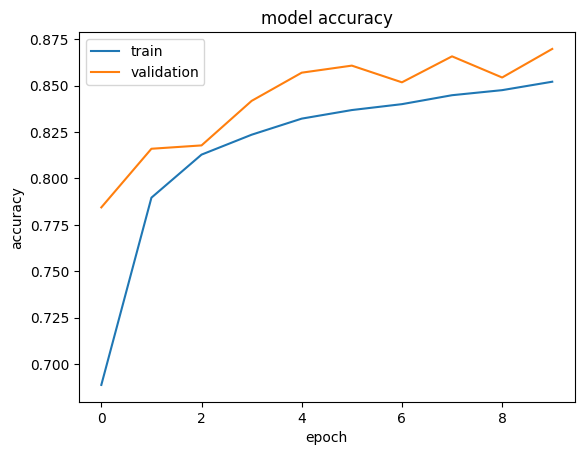

In [ ]:
plt.figure(1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model = load_model("/content/drive/My Drive/modelos/modeloMNIST_FIAP.hdf5")

# 7. Cálculo da precisão de classificação no dataset de testes

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8537999987602234


# 8. Visualizar algumas predições

In [ ]:
y_hat = model.predict(x_test)

313/313 [==============================] - 4s 12ms/step


In [ ]:
y_hat

array([[1.3255281e-04, 8.6057016e-06, 8.7452616e-05, ..., 3.1816831e-01,
        5.3894980e-04, 6.4599299e-01],
       [2.2277453e-03, 2.1967227e-05, 9.6819574e-01, ..., 6.3822408e-06,
        9.3642411e-06, 8.4775493e-06],
       [3.6199053e-05, 9.9844384e-01, 1.8717186e-05, ..., 3.7213790e-06,
        2.0987829e-06, 7.7948715e-07],
       ...,
       [2.8804174e-02, 6.1741443e-06, 1.3040446e-03, ..., 4.9737038e-04,
        9.5425922e-01, 1.2397794e-05],
       [2.5123556e-05, 9.9338502e-01, 1.7367827e-05, ..., 5.7478314e-06,
        2.2045156e-06, 8.1443955e-07],
       [3.9131255e-03, 4.8738842e-05, 1.6017616e-03, ..., 5.4189738e-02,
        6.2447209e-03, 1.0189406e-03]], dtype=float32)

In [ ]:
y_hat[100,:]

array([1.1767885e-03, 6.1299461e-03, 2.7771082e-04, 9.9136317e-01,
       3.2505169e-04, 8.7511971e-06, 6.6950941e-04, 3.7290312e-05,
       9.9494846e-06, 1.7579896e-06], dtype=float32)

In [ ]:
np.argmax(y_hat[100,:])

3

In [ ]:
y_test[100,:]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
np.argmax(y_test[100,:])

3

In [ ]:
labels = [ 'T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'  ]

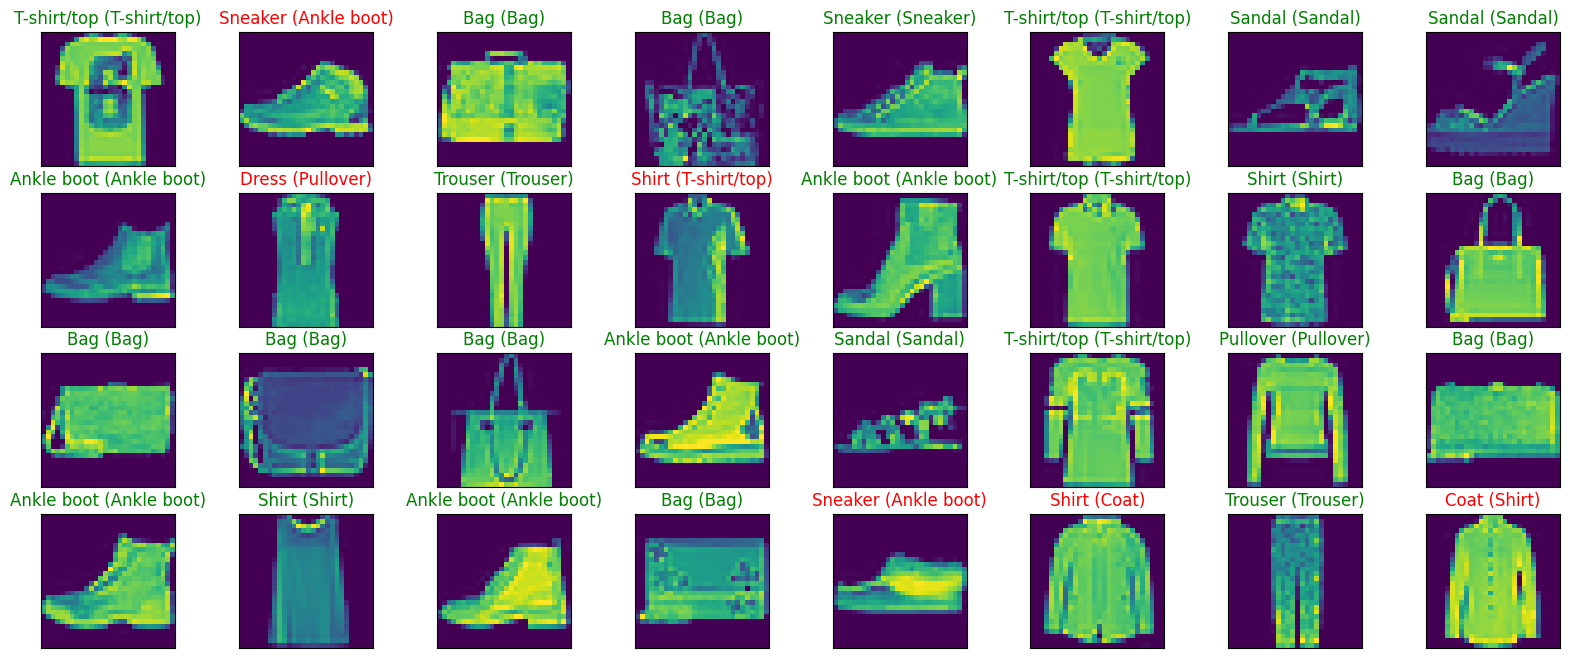

In [ ]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    # amostras corretamente classificadas em verde, incorretamente classificadas em vermelho